# Model for Detecting AI Generated Text

## Loading dataset

In [3]:
#importing opendatasets to download the dataset from kaggle
import opendatasets as od

#Downloading the dataset
dataset = "https://www.kaggle.com/datasets/sunilthite/llm-detect-ai-generated-text-dataset/data"
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: umairahmed23
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 18.6M/18.6M [00:41<00:00, 469kB/s]


In [4]:
import os

# Specify the directory where the dataset is downloaded
data_dir = ".\llm-detect-ai-generated-text-dataset"

# List the files in the directory to verify the file name
print(os.listdir(data_dir))

['Training_Essay_Data.csv']


In [5]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(os.path.join(data_dir, 'Training_Essay_Data.csv'))

# Display the first few rows of the DataFrame
print(df.head())

                                                text  generated
0  Car-free cities have become a subject of incre...          1
1  Car Free Cities  Car-free cities, a concept ga...          1
2    A Sustainable Urban Future  Car-free cities ...          1
3    Pioneering Sustainable Urban Living  In an e...          1
4    The Path to Sustainable Urban Living  In an ...          1


## Importing Libraries

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [7]:
vect = TfidfVectorizer(stop_words='english', max_features=1000)
X = vect.fit_transform(df['text'])
y = df['generated']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
model = RandomForestClassifier(n_estimators = 100)

In [10]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_pred = model.predict(X_test)

accuracy is 98.490%


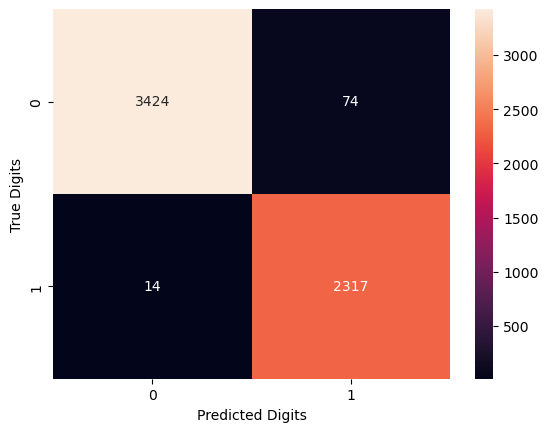

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)
print("accuracy is {0:.3f}%".format(acc*100))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Predicted Digits')
plt.ylabel('True Digits')
plt.show()

In [13]:
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X,y)

RandomForestClassifier()

In [15]:
y_pred2 = model2.predict(X_test)

accuracy is 100.000%


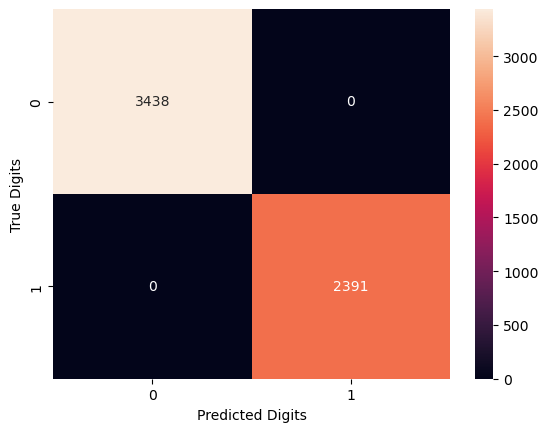

In [16]:
cm2 = confusion_matrix(y_pred2, y_test)
acc2 = accuracy_score(y_pred2, y_test)
print("accuracy is {0:.3f}%".format(acc2*100))
sns.heatmap(cm2, annot=True, fmt='.0f')
plt.xlabel('Predicted Digits')
plt.ylabel('True Digits')
plt.show()

In [17]:
import pickle
with open('AI_generated_text_detection.pkl', 'wb') as fid:
    pickle.dump(model2, fid) 

In [18]:
X[0]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 137 stored elements in Compressed Sparse Row format>

In [19]:
text = """Cars have been around since the 1800's and have been popular ever since. Although, in recent years the number of cars bought and licenses attained have been dropping. Car usage has also dropped, which is a good thing. Because of limited car usage, people are helping the environment and benefiting themselves.

Cars emit pollution which harm our health and the environment's health.

"...Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe... and up to 50 percent in some carintensive areas in the United States." Cars make up a large amount of the emissions that do harm to the environment. When car usage is limited, less people drive, which in turn limits pollution. "... but also in the developing world, where emissions from an increasing number of private cars are owned by the burgeoning middle class are choking cities." Again we see that cars are polluting our world, and it's caused by us. " it will have beneficial implications for carbon emissions and the environment, since transportation is the second largest source of America's emissions, just behind power plants." Cars and other transportation are releasing emissions which are harming the environment. Limited car usage clears up the pollution which helps us and the environment stay healthy.

Many people are taking up new ways of transportation due to bans and such which are due to limits on car usage. They are taking public transportation, walking, carpooling, and so on. All of these methods of alternative transportation are beneficial. "They organize their summer jobs and social life around where they can walk or take public transportation or carpool with friends." It is better to limit car usage because not only are you helping the environment, but you're also saving money and helping yourself out. Due to the lower amount of people who buy cars because of limited car usage, car corporations are also changing. "He proposed partnering with the telecommunications industry to create cities in which pedestrian, bicycle, private cars, commercial and public transportation traffic are woven into a connected network to save time, conserve resources, lower emissions and improve safety.' " The way people live will benefit from lower car usage. Our lifes will be much safer. Although some people may be upset if they can't drive their cars when they want, in the long run it benefits all of the community.

As bans continued to be passed and people are choosing to walk or take the bus instead, limted car usage continues. We can see that it is beneficial to us and will help our environment in the long run. Limited car usage is truely a good thing for us and will hopefully continue."""
flag = int(model2.predict(vect.transform([text])))
if(flag):
   print("AI Generated")
else:
   print("Not a AI Generated")

Not a AI Generated


In [22]:
print(df['text'][1000])

Are cars beginning to go out of fashion? Over the last few years, fewer and fewer people are getting their driver's license, and less people are buying cars. That's because walking or taking public transportation where you need to go can be more beneficial than driving. Using alternative transportation decreases stress, lowers air pollution, and eliminates the cost of owning a car. These reasons are causing people to eliminate personal vehicles out of their lives.

To begin, using alternative transportation can lower stress. Millions of people around the world face the same problem every morning and afternoon: traffic. Traffic jams cause people to be late for work, causing their stress levels to go up. Stress can lead people into depression or become tense. Eliminating a car from someone's life can allow them to be happy. Instead of driving, many people are starting to walk to work, or take a public bus to where they need to go. If more people begin to stop driving, the roads will be l